**PROJECT PROFILE**


This notebook aims to describe the general characteristics of the HOT projects selected for analysis. The HOT API provides data such as country, difficulty level, priority, number of tasks and number of contributors per project.


In [71]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from tqdm.autonotebook import tqdm
from IPython.display import Markdown, display

In [72]:
# Access folder containing acitivity data
data_folder = "XXXXXX"
in_drive = True  # True to mount a drive while working in Google Colab
if in_drive:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


0) Create file with project data ("projects.csv)

In [73]:
# Read file containing the list of HOT projects to be analised
input_data = pd.read_csv(data_folder + "output_archived_projs_selected_ids.csv")
projects = pd.read_csv(data_folder + "output_archived_projs.csv")

In [74]:
#https://wiki.openstreetmap.org/wiki/Humanitarian_OSM_Team/Priority_countries
country_to_abbrev = {
    "Andorra": "AD",
    "United Arab Emirates": "AE",
    "Afghanistan": "AF",
    "Antigua and Barbuda": "AG",
    "Anguilla": "AI",
    "Albania": "AL",
    "Armenia": "AM",
    "Angola": "AO",
    "Antarctica": "AQ",
    "Argentina": "AR",
    "American Samoa": "AS",
    "Austria": "AT",
    "Australia": "AU",
    "Aruba": "AW",
    "Åland Islands": "AX",
    "Azerbaijan": "AZ",
    "Bosnia and Herzegovina": "BA",
    "Barbados": "BB",
    "Bangladesh": "BD",
    "Belgium": "BE",
    "Burkina Faso": "BF",
    "Bulgaria": "BG",
    "Bahrain": "BH",
    "Burundi": "BI",
    "Benin": "BJ",
    "Saint Barthélemy": "BL",
    "Bermuda": "BM",
    "Brunei Darussalam": "BN",
    "Bolivia": "BO",
    "Bonaire, Sint Eustatius and Saba": "BQ",
    "Brazil": "BR",
    "The Bahamas": "BS",
    "Bhutan": "BT",
    "Bouvet Island": "BV",
    "Botswana": "BW",
    "Belarus": "BY",
    "Belize": "BZ",
    "Canada": "CA",
    "Cocos (Keeling) Islands": "CC",
    "Democratic Republic of the Congo": "CD",
    "Central African Republic": "CF",
    "Congo-Brazzaville": "CG",
    "Switzerland": "CH",
    "Côte dIvoire": "CI",
    "Cook Islands": "CK",
    "Chile": "CL",
    "Cameroon": "CM",
    "China": "CN",
    "Colombia": "CO",
    "Costa Rica": "CR",
    "Cuba": "CU",
    "Cabo Verde": "CV",
    "Curaçao": "CW",
    "Christmas Island": "CX",
    "Cyprus": "CY",
    "Czechia": "CZ",
    "Germany": "DE",
    "Djibouti": "DJ",
    "Denmark": "DK",
    "Dominica": "DM",
    "Dominican Republic": "DO",
    "Algeria": "DZ",
    "Ecuador": "EC",
    "Estonia": "EE",
    "Egypt": "EG",
    "Western Sahara": "EH",
    "Eritrea": "ER",
    "Spain": "ES",
    "Ethiopia": "ET",
    "Finland": "FI",
    "Fiji": "FJ",
    "Falkland Islands (Malvinas)": "FK",
    "Federated States of Micronesia": "FM",
    "Faroe Islands": "FO",
    "France": "FR",
    "Gabon": "GA",
    "United Kingdom": "GB",
    "Grenada": "GD",
    "Georgia": "GE",
    "French Guiana": "GF",
    "Guernsey": "GG",
    "Ghana": "GH",
    "Gibraltar": "GI",
    "Greenland": "GL",
    "The Gambia": "GM",
    "Guinea": "GN",
    "Guadeloupe": "GP",
    "Equatorial Guinea": "GQ",
    "Greece": "GR",
    "South Georgia and the South Sandwich Islands": "GS",
    "Guatemala": "GT",
    "Guam": "GU",
    "Guinea-Bissau": "GW",
    "Guyana": "GY",
    "Hong Kong": "HK",
    "Heard Island and McDonald Islands": "HM",
    "Honduras": "HN",
    "Croatia": "HR",
    "Haiti": "HT",
    "Hungary": "HU",
    "Indonesia": "ID",
    "Ireland": "IE",
    "Israel": "IL",
    "Isle of Man": "IM",
    "India": "IN",
    "British Indian Ocean Territory": "IO",
    "Iraq": "IQ",
    "Iran (Islamic Republic of)": "IR",
    "Iceland": "IS",
    "Italy": "IT",
    "Jersey": "JE",
    "Jamaica": "JM",
    "Jordan": "JO",
    "Japan": "JP",
    "Kenya": "KE",
    "Kyrgyzstan": "KG",
    "Cambodia": "KH",
    "Kiribati": "KI",
    "Comoros": "KM",
    "Saint Kitts and Nevis": "KN",
    "Korea (Democratic People's Republic of)": "KP",
    "Korea, Republic of": "KR",
    "Kuwait": "KW",
    "Cayman Islands": "KY",
    "Kazakhstan": "KZ",
    "Laos": "LA",
    "Lebanon": "LB",
    "Saint Lucia": "LC",
    "Liechtenstein": "LI",
    "Sri Lanka": "LK",
    "Liberia": "LR",
    "Lesotho": "LS",
    "Lithuania": "LT",
    "Luxembourg": "LU",
    "Latvia": "LV",
    "Libya": "LY",
    "Morocco": "MA",
    "Monaco": "MC",
    "Moldova": "MD",
    "Montenegro": "ME",
    "Saint Martin (French part)": "MF",
    "Madagascar": "MG",
    "Marshall Islands": "MH",
    "North Macedonia": "MK",
    "Mali": "ML",
    "Myanmar": "MM",
    "Mongolia": "MN",
    "Macao": "MO",
    "Northern Mariana Islands": "MP",
    "Martinique": "MQ",
    "Mauritania": "MR",
    "Montserrat": "MS",
    "Malta": "MT",
    "Mauritius": "MU",
    "Maldives": "MV",
    "Malawi": "MW",
    "Mexico": "MX",
    "Malaysia": "MY",
    "Mozambique": "MZ",
    "Namibia": "NA",
    "New Caledonia": "NC",
    "Niger": "NE",
    "Norfolk Island": "NF",
    "Nigeria": "NG",
    "Nicaragua": "NI",
    "Netherlands": "NL",
    "Netherlands Antilles": "AN",
    "Norway": "NO",
    "Nepal": "NP",
    "Nauru": "NR",
    "Niue": "NU",
    "New Zealand": "NZ",
    "Oman": "OM",
    "Panama": "PA",
    "Peru": "PE",
    "French Polynesia": "PF",
    "Papua New Guinea": "PG",
    "Philippines": "PH",
    "Pakistan": "PK",
    "Poland": "PL",
    "Saint Pierre and Miquelon": "PM",
    "Pitcairn": "PN",
    "Puerto Rico": "PR",
    "Palestine": "PS",
    "Portugal": "PT",
    "Palau": "PW",
    "Paraguay": "PY",
    "Qatar": "QA",
    "Réunion": "RE",
    "Romania": "RO",
    "Serbia": "RS",
    "Russia": "RU",
    "Rwanda": "RW",
    "Saudi Arabia": "SA",
    "Solomon Islands": "SB",
    "Seychelles": "SC",
    "Sudan": "SD",
    "Sweden": "SE",
    "Singapore": "SG",
    "Saint Helena, Ascension and Tristan da Cunha": "SH",
    "Slovenia": "SI",
    "Svalbard and Jan Mayen": "SJ",
    "Slovakia": "SK",
    "Sierra Leone": "SL",
    "San Marino": "SM",
    "Senegal": "SN",
    "Somalia": "SO",
    "Somaliland": "SO",
    "Suriname": "SR",
    "South Sudan": "SS",
    "Sao Tome and Principe": "ST",
    "El Salvador": "SV",
    "Sint Maarten (Dutch part)": "SX",
    "Syria": "SY",
    "Eswatini": "SZ",
    "Turks and Caicos Islands": "TC",
    "Chad": "TD",
    "French Southern Territories": "TF",
    "Togo": "TG",
    "Thailand": "TH",
    "Tajikistan": "TJ",
    "Tokelau": "TK",
    "East Timor": "TL",
    "Turkmenistan": "TM",
    "Tunisia": "TN",
    "Tonga": "TO",
    "Turkey": "TR",
    "Trinidad and Tobago": "TT",
    "Tuvalu": "TV",
    "Taiwan, Province of China": "TW",
    "Tanzania": "TZ",
    "Ukraine": "UA",
    "Uganda": "UG",
    "United States Minor Outlying Islands": "UM",
    "United States": "US",
    "Uruguay": "UY",
    "Uzbekistan": "UZ",
    "Holy See": "VA",
    "Saint Vincent and the Grenadines": "VC",
    "Venezuela": "VE",
    "British Virgin Islands": "VG",
    "United States Virgin Islands": "VI",
    "Vietnam": "VN",
    "Vanuatu": "VU",
    "Wallis and Futuna": "WF",
    "Samoa": "WS",
    "Yemen": "YE",
    "Mayotte": "YT",
    "South Africa": "ZA",
    "Zambia": "ZM",
    "Zimbabwe": "ZW",
}

In [75]:
country_region = {
    "Andorra": "OTHER",
    "United Arab Emirates": "OTHER",
    "Afghanistan": "AP",
    "Antigua and Barbuda": "LAC",
    "Anguilla": "OTHER",
    "Albania": "OTHER",
    "Armenia": "OTHER",
    "Angola": "ESA",
    "Antarctica": "OTHER",
    "Argentina": "OTHER",
    "American Samoa": "OTHER",
    "Austria": "OTHER",
    "Australia": "OTHER",
    "Aruba": "OTHER",
    "Åland Islands": "OTHER",
    "Azerbaijan": "OTHER",
    "Bosnia and Herzegovina": "OTHER",
    "Barbados": "OTHER",
    "Bangladesh": "AP",
    "Belgium": "OTHER",
    "Burkina Faso": "WNA",
    "Bulgaria": "OTHER",
    "Bahrain": "OTHER",
    "Burundi": "ESA",
    "Benin": "WNA",
    "Saint Barthélemy": "OTHER",
    "Bermuda": "OTHER",
    "Brunei Darussalam": "AP",
    "Bolivia": "LAC",
    "Bonaire, Sint Eustatius and Saba": "OTHER",
    "Brazil": "LAC",
    "The Bahamas": "OTHER",
    "Bhutan": "AP",
    "Bouvet Island": "OTHER",
    "Botswana": "OTHER",
    "Belarus": "OTHER",
    "Belize": "LAC",
    "Canada": "OTHER",
    "Cocos (Keeling) Islands": "OTHER",
    "Democratic Republic of the Congo": "ESA",
    "Central African Republic": "WNA",
    "Congo-Brazzaville": "WNA",
    "Switzerland": "OTHER",
    "Côte dIvoire": "WNA",
    "Cook Islands": "OTHER",
    "Chile": "LAC",
    "Cameroon": "WNA",
    "China": "OTHER",
    "Colombia": "OTHER",
    "Costa Rica": "LAC",
    "Cuba": "OTHER",
    "Cabo Verde": "WNA",
    "Curaçao": "OTHER",
    "Christmas Island": "OTHER",
    "Cyprus": "OTHER",
    "Czechia": "OTHER",
    "Germany": "OTHER",
    "Djibouti": "ESA",
    "Denmark": "OTHER",
    "Dominica": "LAC",
    "Dominican Republic": "LAC",
    "Algeria": "WNA",
    "Ecuador": "LAC",
    "Estonia": "OTHER",
    "Egypt": "ESA",
    "Western Sahara": "OTHER",
    "Eritrea": "OTHER",
    "Spain": "OTHER",
    "Ethiopia": "ESA",
    "Finland": "OTHER",
    "Fiji": "AP",
    "Falkland Islands (Malvinas)": "OTHER",
    "Federated States of Micronesia": "AP",
    "Faroe Islands": "OTHER",
    "France": "OTHER",
    "Gabon": "OTHER",
    "United Kingdom": "OTHER",
    "Grenada": "OTHER",
    "Georgia": "OTHER",
    "French Guiana": "OTHER",
    "Guernsey": "OTHER",
    "Ghana": "WNA",
    "Gibraltar": "OTHER",
    "Greenland": "OTHER",
    "The Gambia": "WNA",
    "Guinea": "WNA",
    "Guadeloupe": "OTHER",
    "Equatorial Guinea": "WNA",
    "Greece": "OTHER",
    "South Georgia and the South Sandwich Islands": "OTHER",
    "Guatemala": "LAC",
    "Guam": "OTHER",
    "Guinea-Bissau": "WNA",
    "Guyana": "LAC",
    "Hong Kong": "OTHER",
    "Heard Island and McDonald Islands": "OTHER",
    "Honduras": "LAC",
    "Croatia": "OTHER",
    "Haiti": "LAC",
    "Hungary": "OTHER",
    "Indonesia": "AP",
    "Ireland": "OTHER",
    "Israel": "OTHER",
    "Isle of Man": "OTHER",
    "India": "AP",
    "British Indian Ocean Territory": "OTHER",
    "Iraq": "OTHER",
    "Iran (Islamic Republic of)": "OTHER",
    "Iceland": "OTHER",
    "Italy": "OTHER",
    "Jersey": "OTHER",
    "Jamaica": "LAC",
    "Jordan": "OTHER",
    "Japan": "OTHER",
    "Kenya": "ESA",
    "Kyrgyzstan": "OTHER",
    "Cambodia": "AP",
    "Kiribati": "AP",
    "Comoros": "ESA",
    "Saint Kitts and Nevis": "OTHER",
    "Korea (Democratic People's Republic of)": "OTHER",
    "Korea, Republic of": "OTHER",
    "Kuwait": "OTHER",
    "Cayman Islands": "OTHER",
    "Kazakhstan": "OTHER",
    "Laos": "AP",
    "Lebanon": "OTHER",
    "Saint Lucia": "OTHER",
    "Liechtenstein": "OTHER",
    "Sri Lanka": "AP",
    "Liberia": "WNA",
    "Lesotho": "ESA",
    "Lithuania": "OTHER",
    "Luxembourg": "OTHER",
    "Latvia": "OTHER",
    "Libya": "OTHER",
    "Morocco": "WNA",
    "Monaco": "OTHER",
    "Moldova": "OTHER",
    "Montenegro": "OTHER",
    "Saint Martin (French part)": "OTHER",
    "Madagascar": "ESA",
    "Marshall Islands": "OTHER",
    "North Macedonia": "OTHER",
    "Mali": "WNA",
    "Myanmar": "AP",
    "Mongolia": "OTHER",
    "Macao": "OTHER",
    "Northern Mariana Islands": "OTHER",
    "Martinique": "OTHER",
    "Mauritania": "WNA",
    "Montserrat": "OTHER",
    "Malta": "OTHER",
    "Mauritius": "ESA",
    "Maldives": "OTHER",
    "Malawi": "ESA",
    "Mexico": "LAC",
    "Malaysia": "AP",
    "Mozambique": "ESA",
    "Namibia": "ESA",
    "New Caledonia": "OTHER",
    "Niger": "WNA",
    "Norfolk Island": "OTHER",
    "Nigeria": "WNA",
    "Nicaragua": "LAC",
    "Netherlands": "OTHER",
    "Netherlands Antilles": "OTHER",
    "Norway": "OTHER",
    "Nepal": "AP",
    "Nauru": "OTHER",
    "Niue": "OTHER",
    "New Zealand": "OTHER",
    "Oman": "OTHER",
    "Panama": "LAC",
    "Peru": "LAC",
    "French Polynesia": "OTHER",
    "Papua New Guinea": "AP",
    "Philippines": "AP",
    "Pakistan": "AP",
    "Poland": "OTHER",
    "Saint Pierre and Miquelon": "OTHER",
    "Pitcairn": "OTHER",
    "Puerto Rico": "OTHER",
    "Palestine": "OTHER",
    "Portugal": "OTHER",
    "Palau": "OTHER",
    "Paraguay": "OTHER",
    "Qatar": "OTHER",
    "Réunion": "OTHER",
    "Romania": "OTHER",
    "Serbia": "OTHER",
    "Russia": "OTHER",
    "Rwanda": "ESA",
    "Saudi Arabia": "OTHER",
    "Solomon Islands": "AP",
    "Seychelles": "OTHER",
    "Sudan": "ESA",
    "Sweden": "OTHER",
    "Singapore": "OTHER",
    "Saint Helena, Ascension and Tristan da Cunha": "OTHER",
    "Slovenia": "OTHER",
    "Svalbard and Jan Mayen": "OTHER",
    "Slovakia": "OTHER",
    "Sierra Leone": "WNA",
    "San Marino": "OTHER",
    "Senegal": "WNA",
    "Somalia": "ESA",
    "Somaliland": "ESA",
    "Suriname": "OTHER",
    "South Sudan": "ESA",
    "Sao Tome and Principe": "WNA",
    "El Salvador": "LAC",
    "Sint Maarten (Dutch part)": "OTHER",
    "Syria": "OTHER",
    "Eswatini": "ESA",
    "Turks and Caicos Islands": "OTHER",
    "Chad": "WNA",
    "French Southern Territories": "OTHER",
    "Togo": "WNA",
    "Thailand": "OTHER",
    "Tajikistan": "OTHER",
    "Tokelau": "OTHER",
    "East Timor": "AP",
    "Turkmenistan": "OTHER",
    "Tunisia": "OTHER",
    "Tonga": "AP",
    "Turkey": "OTHER",
    "Trinidad and Tobago": "LAC",
    "Tuvalu": "OTHER",
    "Taiwan, Province of China": "OTHER",
    "Tanzania": "ESA",
    "Ukraine": "OTHER",
    "Uganda": "ESA",
    "United States Minor Outlying Islands": "OTHER",
    "United States": "OTHER",
    "Uruguay": "LAC",
    "Uzbekistan": "AP",
    "Holy See": "OTHER",
    "Saint Vincent and the Grenadines": "OTHER",
    "Venezuela": "LAC",
    "British Virgin Islands": "OTHER",
    "United States Virgin Islands": "OTHER",
    "Vietnam": "AP",
    "Vanuatu": "AP",
    "Wallis and Futuna": "OTHER",
    "Samoa": "OTHER",
    "Yemen": "AP",
    "Mayotte": "OTHER",
    "South Africa": "OTHER",
    "Zambia": "ESA",
    "Zimbabwe": "ESA",
}

In [76]:
# Display the project dataframe
countries=[]
for index, row in projects.reset_index().iterrows():
    try:
        countries.append(row['country'].strip('][').split(', ')[0].replace("'","").replace('"',""))
    except:
        countries.append(row['country'])
projects['country']=countries
projects['country_code']= projects['country'].map(country_to_abbrev)
input_data=input_data.merge(projects[["projectId","country","country_code","difficulty","priority","totalContributors","organisationName"]], on="projectId", how="left")
stats = pd.read_csv(data_folder + "output_archived_projs_stats.csv")
input_data=input_data.merge(stats[["projectId","totalTasks"]], on="projectId", how="left")
input_data['quantile'] = pd.qcut(input_data['totalTasks'], 4, labels=["Q1","Q2","Q3","Q4"])
input_data['region']= input_data['country'].map(country_region)
input_data

,projectId,country,country_code,difficulty,priority,totalContributors,organisationName,totalTasks,quantile,region
0,11875,Nepal,NP,EASY,MEDIUM,9,Youth Innovation Lab,89,Q1,AP
1,11884,Philippines,PH,EASY,MEDIUM,65,Action for Economic Reforms,194,Q2,AP
2,11890,Guatemala,GT,EASY,LOW,96,HOT,734,Q4,LAC
3,11891,Guatemala,GT,EASY,LOW,27,HOT,606,Q4,LAC
4,11892,Nigeria,NG,EASY,MEDIUM,137,Médecins Sans Frontières (MSF),600,Q4,WNA
...,...,...,...,...,...,...,...,...,...,...
741,15689,Malawi,MW,MODERATE,MEDIUM,38,Netherlands Red Cross,102,Q1,ESA
742,15705,Ghana,GH,EASY,HIGH,41,OSM Ghana,258,Q2,WNA
743,15744,Ghana,GH,EASY,HIGH,15,OSM Ghana,213,Q2,WNA
744,15745,Ghana,GH,MODERATE,URGENT,110,OSM Ghana,396,Q3,WNA


In [77]:
# Show the absolute and relative frequency of projects per region
region = pd.DataFrame(input_data.groupby(['region'])['projectId'].count()).reset_index()
region['diff_percent'] = round((region['projectId'] / region['projectId'].sum()) * 100,1)
region.sort_values(by='diff_percent', ascending=False)

,region,projectId,diff_percent
1,ESA,309,41.4
2,LAC,194,26.0
4,WNA,129,17.3
0,AP,82,11.0
3,OTHER,32,4.3


In [78]:
# Show the absolute and relative frequency of projects per organisation
organisation = pd.DataFrame(input_data.groupby(['organisationName'])['projectId'].count()).reset_index()
organisation['diff_percent'] = round((organisation['projectId'] / organisation['projectId'].sum()) * 100,1)
organisation.sort_values(by='diff_percent', ascending=False)

,organisationName,projectId,diff_percent
10,HOT,186,24.9
17,Médecins Sans Frontières (MSF),128,17.2
49,Tanzania Development Trust,41,5.5
42,Open Mapping Hub ESA,39,5.2
46,Operation Fistula,34,4.6
50,UN Mappers,32,4.3
15,MapUganda,29,3.9
3,CartONG,29,3.9
55,YouthMappers,22,2.9
23,OSM Brasil,21,2.8


In [79]:
# Show the absolute and relative frequency of projects per difficulty level
difficulty = pd.DataFrame(input_data.groupby(['difficulty'])['projectId'].count()).reset_index()
difficulty['diff_percent'] = round((difficulty['projectId'] / difficulty['projectId'].sum()) * 100,1)
difficulty.sort_values(by='diff_percent', ascending=False)

,difficulty,projectId,diff_percent
1,EASY,501,67.2
2,MODERATE,239,32.0
0,CHALLENGING,6,0.8


In [80]:
# Show the absolute and relative frequency of projects per priority level
priority = pd.DataFrame(input_data.groupby(['priority'])['projectId'].count()).reset_index()
priority['diff_percent'] = round((priority['projectId'] / difficulty['projectId'].sum()) * 100,1)
priority.sort_values(by='diff_percent', ascending=False)

,priority,projectId,diff_percent
1,LOW,377,50.5
2,MEDIUM,232,31.1
0,HIGH,92,12.3
3,URGENT,45,6.0


In [81]:
# Show the absolute and relative frequency of projects per priority level for easy projects
priority = pd.DataFrame(input_data[input_data['difficulty']=="EASY"].groupby(['priority'])['projectId'].count()).reset_index()
priority['diff_percent'] = round((priority['projectId'] / priority['projectId'].sum()) * 100,1)
priority.sort_values(by='diff_percent', ascending=False)

,priority,projectId,diff_percent
1,LOW,301,60.1
2,MEDIUM,122,24.4
0,HIGH,65,13.0
3,URGENT,13,2.6


In [82]:
# Show the absolute and relative frequency of projects per priority level for projects with moderate difficulty
priority = pd.DataFrame(input_data[input_data['difficulty']=="MODERATE"].groupby(['priority'])['projectId'].count()).reset_index()
priority['diff_percent'] = round((priority['projectId'] / priority['projectId'].sum()) * 100,1)
priority.sort_values(by='diff_percent', ascending=False)

,priority,projectId,diff_percent
2,MEDIUM,109,45.6
1,LOW,74,31.0
3,URGENT,31,13.0
0,HIGH,25,10.5


In [83]:
# Distribution of total number of contributors per project
pd.DataFrame(input_data.totalContributors.describe())

,totalContributors
count,746.000000
mean,91.249330
std,227.466093
min,1.000000
25%,14.000000
50%,38.000000
75%,86.750000
max,3608.000000


In [84]:
# Distribution of total number of tasks per project
pd.DataFrame(input_data.totalTasks.describe())

,totalTasks
count,746.000000
mean,418.617962
std,487.271469
min,8.000000
25%,107.250000
50%,286.000000
75%,564.000000
max,4483.000000


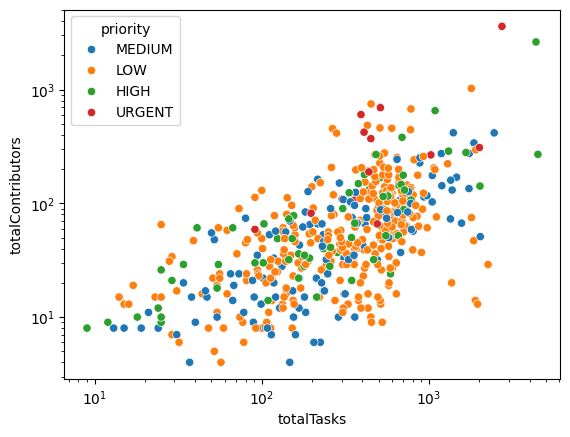

In [85]:
# Scatterplot of total number of contributors vs total number of tasks for easy projects segregated by priority
sns.scatterplot(x = "totalTasks", y = "totalContributors", hue = "priority",data = input_data[input_data["difficulty"]=="EASY"])
plt.xscale('log')
plt.yscale('log')

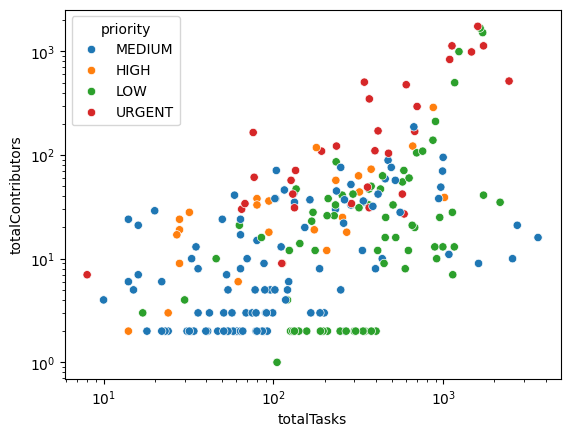

In [86]:
# Scatterplot of total number of contributors vs total number of tasks for projects with moderate difficulty segregated by priority
sns.scatterplot(x = "totalTasks", y = "totalContributors", hue = "priority",data = input_data[input_data["difficulty"]=="MODERATE"])
plt.xscale('log')
plt.yscale('log')

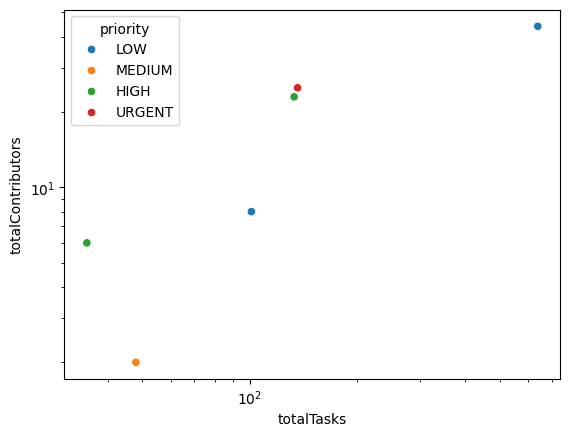

In [87]:
# Scatterplot of total number of contributors vs total number of tasks for challenging projects segregated by priority
sns.scatterplot(x = "totalTasks", y = "totalContributors", hue = "priority",data = input_data[input_data["difficulty"]=="CHALLENGING"])
plt.xscale('log')
plt.yscale('log')

In [88]:
input_data.to_excel("projects.xlsx", index = False)